In [1]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
geo_surface = xr.open_dataset('geopotential.nc')

In [4]:
geo_surface = geo_surface.z/9.80665

In [5]:
geo_surface = geo_surface.mean(dim=['time'])

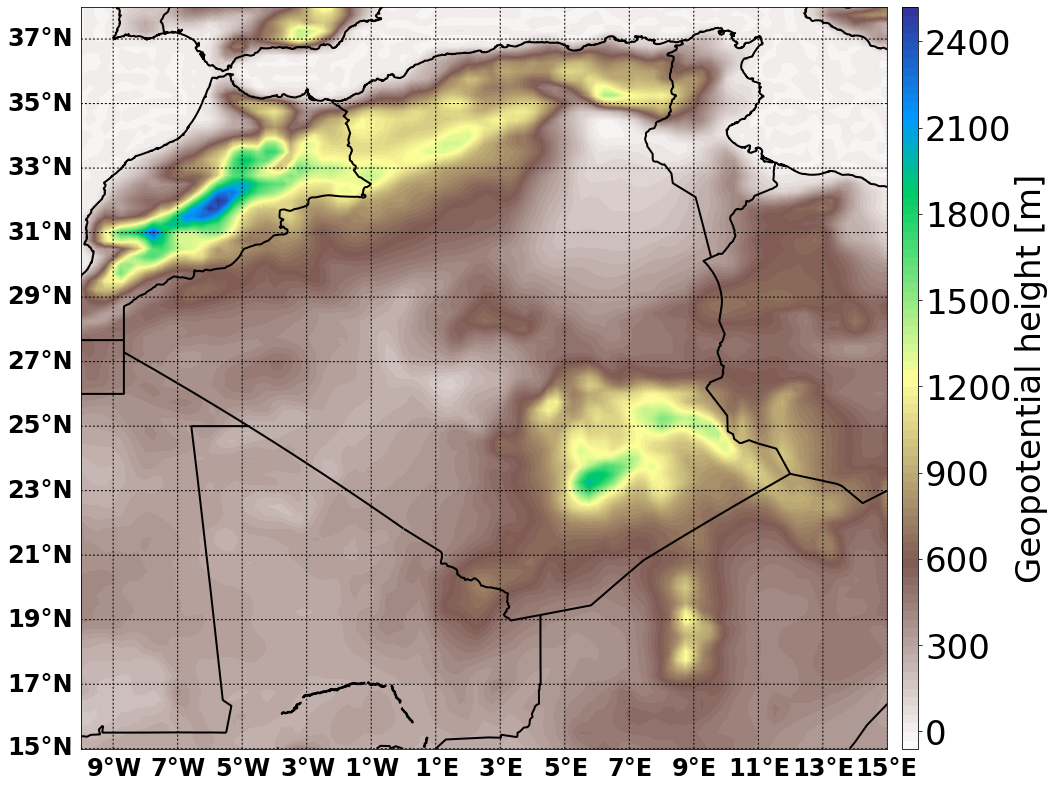

In [8]:
#----------------------------------------------
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines(linewidth = 2)
m.drawcountries(linewidth = 2)

m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=24, fontweight='bold')
m.drawmeridians(np.arange(-15,20,2),dashes=[2,2],labels=[0,0,0,1],fontsize=24, fontweight='bold')
xpt,ypt = m(geo_surface.longitude,geo_surface.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
im1 = m.contourf(X,Y,geo_surface,100,cmap='terrain_r',latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(-300, 3000, 300), pad=0.2)

cb.set_label(r"Geopotential height [m]", size=34)
cb.ax.tick_params(labelsize=34)

plt.show();